In [1]:
import pandas as pd

cnt_km_years_df=pd.read_csv('cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv')


In [2]:
cnt_km_years_df.head()

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293
1,69,150000,1991,40,110,1600,516.4348,346.767661
2,11,90000,1991,60,330,10000,2342.4545,3017.432333
3,26,100000,1991,60,200,8750,1392.3846,1598.662833
4,42,125000,1991,60,150,4600,1140.6429,1010.314138


In [3]:
cars_df=pd.read_csv('autos.csv',encoding='iso-8859-1')
cars_df.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
cars_df.drop(['dateCrawled','seller', 
              'offerType', 'abtest','dateCreated', 'nrOfPictures', 'postalCode','lastSeen'], axis='columns', inplace=True)

print("Удалены столбцы 'dateCrawled','seller','offerType', 'abtest','dateCreated', 'nrOfPictures', 'postalCode','lastSeen'")
cars_df

Удалены столбцы 'dateCrawled','seller','offerType', 'abtest','dateCreated', 'nrOfPictures', 'postalCode','lastSeen'


,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [5]:
#2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

print("Размер данных до удаления (строк, столбцов): ", cars_df.shape)

Размер данных до удаления (строк, столбцов):  (371528, 12)


In [6]:
cols = ['name','price','vehicleType','yearOfRegistration','gearbox',
                                  'powerPS','model','kilometer','monthOfRegistration','fuelType','brand',
                                  'notRepairedDamage']
witout_duplicates = cars_df.drop_duplicates(cols)
witout_duplicates

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [7]:
print("Размер данных после удаления одинаковых строк (строк, столбцов): ", witout_duplicates.shape)

Размер данных после удаления одинаковых строк (строк, столбцов):  (362781, 12)


In [8]:
witout_duplicates_and_null = witout_duplicates.dropna()
witout_duplicates_and_null 

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,nein
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


In [9]:
print("Размер данных после удаления пустых строк (строк, столбцов): ", witout_duplicates_and_null.shape)

Размер данных после удаления пустых строк (строк, столбцов):  (254921, 12)


In [10]:
#3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). 
# Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

print("Размер данных до удаления: ", witout_duplicates_and_null.shape)

new_list = witout_duplicates_and_null[
      (witout_duplicates_and_null.yearOfRegistration >= 1998) 
      & (witout_duplicates_and_null.price >= 100) 
      & (witout_duplicates_and_null.price <= 1000) 
      & (witout_duplicates_and_null.powerPS >= 20) 
      & (witout_duplicates_and_null.powerPS <= 100)]



Размер данных до удаления:  (254921, 12)


In [11]:
print("Размер данных после удаления неподходящих по параметрам: ", new_list.shape)


Размер данных после удаления неподходящих по параметрам:  (12733, 12)


matplotlib.axes._subplots.AxesSubplot

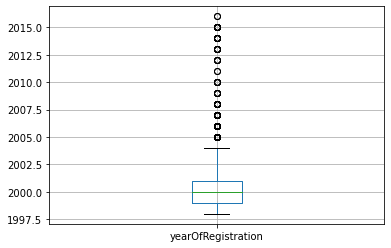

In [12]:
boxplot1 = new_list.boxplot(column=['yearOfRegistration'], return_type='axes')
type(boxplot1)


matplotlib.axes._subplots.AxesSubplot

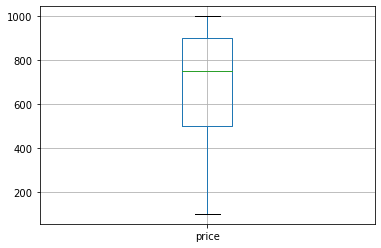

In [13]:
boxplot2 = new_list.boxplot(column=['price'], return_type='axes')
type(boxplot2)


matplotlib.axes._subplots.AxesSubplot

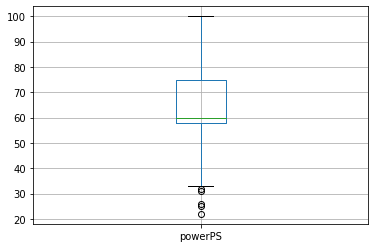

In [14]:
boxplot3 = new_list.boxplot(column=['powerPS'], return_type='axes')
type(boxplot3)

In [15]:
#4. Заполнить пропущенные данные в строковых полях.
witout_duplicates.head()


,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [16]:
witout_duplicates.isnull().sum() 

name                       0
price                      0
vehicleType            37388
yearOfRegistration         0
gearbox                19108
powerPS                    0
model                  20269
kilometer                  0
monthOfRegistration        0
fuelType               33053
brand                      0
notRepairedDamage      70206
dtype: int64

In [17]:
witout_duplicates['vehicleType'].fillna(value='New value', inplace=True)
witout_duplicates['gearbox'].fillna(value='New value', inplace=True)
witout_duplicates['model'].fillna(value='New value', inplace=True)
witout_duplicates['fuelType'].fillna(value='New value', inplace=True)
witout_duplicates['notRepairedDamage'].fillna(value='New value', inplace=True)

witout_duplicates.isnull().sum() 

D:\Soft\WPy64-3810\python-3.8.1.amd64\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [18]:
witout_duplicates.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,New value,1993,manuell,0,golf,150000,0,benzin,volkswagen,New value
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,New value,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,New value
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


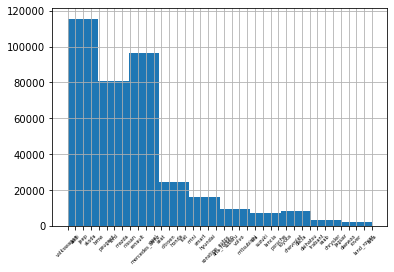

In [19]:
#5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

witout_duplicates.brand.hist(xrot=45,bins=10,xlabelsize=5) 

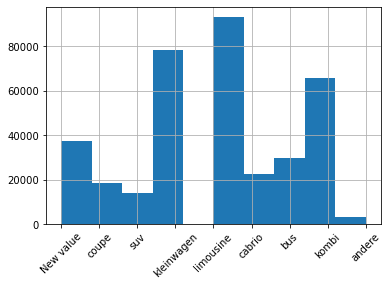

In [20]:
witout_duplicates.vehicleType.hist(xrot=45,bins=10,xlabelsize=10)


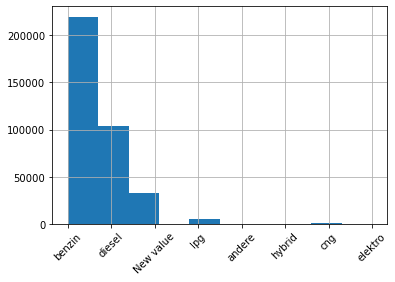

In [21]:
witout_duplicates.fuelType.hist(xrot=45,bins=10,xlabelsize=10)

In [22]:
#6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
def get_length_name(name):
    return len(name)
length_name = cars_df['name'].apply(get_length_name)

cars_df['Length_of_name'] = length_name
cars_df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Length_of_name
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,10
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,20
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,30
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,30


In [23]:
#7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

import seaborn as sns

cars_df[:10]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Length_of_name
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,10
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,20
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,30
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,30
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,50
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,27
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,28
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,36
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,53


In [24]:
cars_df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,Length_of_name
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,-0.000053
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,0.001982
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358,0.010299
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,-0.021107
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000,0.013950
Length_of_name,-0.000053,0.001982,0.010299,-0.021107,0.013950,1.000000


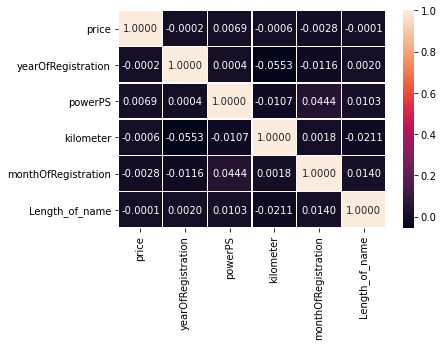

In [25]:
sns.heatmap(cars_df.corr(), annot=True, fmt=".4f", linewidths=.5)

In [26]:
#8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова.
# Оцените значение p-value. Постройте плотность распределения признаков.
import scipy.stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import numpy as np

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

vehicleCoder =  pd.Series(label_encoder.fit_transform(cars_df['vehicleType'].astype(str)))
prices = pd.Series(cars_df['price'])

pears = pearsonr(prices,vehicleCoder)
spearm = spearmanr(prices,vehicleCoder)
print("Коэффициент корреляции Пирсона: ",pears[0], " p-value: ",pears[1])
print("Коэффициент корреляции Спирмена: ",spearm[0], " p-value: ",spearm[1])

if (pears[1]<0.05):
    print("p-value Пирсона is normal")
else:
    print("p-value Пирсона is not normal")
    
if (spearm[1]<0.05):
    print("p-value Спирмена is normal")
else:
    print("p-value Спирмена is not normal")



Коэффициент корреляции Пирсона:  -0.004061287588339432  p-value:  0.013305630810612212
Коэффициент корреляции Спирмена:  -0.05465383632405501  p-value:  1.0868741393497715e-243
p-value Пирсона is normal
p-value Спирмена is normal


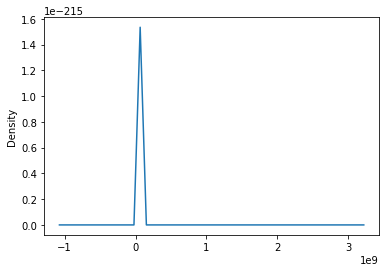

In [27]:
prices.plot.kde(ind=50)

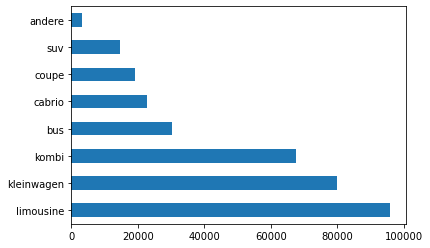

In [28]:
cars_df['vehicleType'].value_counts().plot.barh()

In [29]:
#9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

cars_df['brand+model'] = [n for n in (cars_df['brand'] + " " + cars_df['model']) ]
cars_df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Length_of_name,brand+model
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,10,volkswagen golf
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,20,NaN
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,30,jeep grand
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,18,volkswagen golf
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,30,skoda fabia
